In [63]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import and store data in a dataframe

In [65]:
df=pd.read_csv("C:\\Users\\kalya\\Downloads\\wdbc.data",
               names=["ID","Diagnosis","Mean Radius","Mean Texture","Mean Perimeter",
                      "Mean Area","Mean Smoothness","Mean Compactness","Mean Concavity",
                      "Mean Concave Points","Mean Symmetry","Mean Fractal Dimension",
                      "Radius SE","Texture SE","Perimeter SE",
                      "Area SE","Smoothness SE","Compactness SE",
                      "Concavity SE","Concave Points SE","Symmetry SE","Fractal Dimension SE",
                      "Worst Radius","Worst Texture","Worst Perimeter",
                      "Worst Area","Worst Smoothness","Worst Compactness",
                      "Worst Concavity","Worst Concave Points","Worst Symmetry","Worst Fractal Dimension"])

Remove Outliers

In [66]:
df_q1=df.iloc[:,1:32].quantile(0.25)
df_q3=df.iloc[:,1:32].quantile(0.75)
df_iqr=df_q3-df_q1

In [68]:
df_out = df[~((df.loc[:,~df.columns.isin(["Diagnosis","ID"])] < (df_q1 - 1.5 * df_iqr)) |(df.loc[:,~df.columns.isin(["Diagnosis","ID"])] > (df_q3 + 1.5 * df_iqr))
).any(axis=1)]

In [69]:
df_out.shape

(398, 32)

Treat “diagnosis” – 2nd Column as your Dependent Variable and Rest of the columns as Independent Variable and split the table.

In [71]:
df_features = df_out.drop(labels=["Diagnosis"],axis=1)
#df_labels=pd.DataFrame(df_out.Diagnosis)
df_labels=df_out.loc[:,["Diagnosis"]]

Drop "id" column from independent variables

In [72]:
df_features = df_features.drop(labels=["ID"],axis=1)


Convert Categorical values("M" and "B") of Dependent Variable -Y into numerical value ("1" and "0") respectively

In [73]:
#df_labels
df_labels["Diagnosis"]=np.where(df_labels["Diagnosis"]=='M',1,0)
#df_labels

In [74]:
#df_labels.Diagnosis.astype('int')
df_labels.dtypes


Diagnosis    int32
dtype: object

Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [75]:
df_features.corrwith(df_labels.Diagnosis)

Mean Radius                0.680705
Mean Texture               0.388596
Mean Perimeter             0.695835
Mean Area                  0.698005
Mean Smoothness            0.271570
Mean Compactness           0.514346
Mean Concavity             0.710567
Mean Concave Points        0.752190
Mean Symmetry              0.243588
Mean Fractal Dimension    -0.086631
Radius SE                  0.571842
Texture SE                 0.007755
Perimeter SE               0.565909
Area SE                    0.703715
Smoothness SE             -0.036030
Compactness SE             0.229104
Concavity SE               0.325974
Concave Points SE          0.387972
Symmetry SE               -0.194890
Fractal Dimension SE       0.062799
Worst Radius               0.761081
Worst Texture              0.437909
Worst Perimeter            0.768194
Worst Area                 0.773626
Worst Smoothness           0.396847
Worst Compactness          0.533996
Worst Concavity            0.653300
Worst Concave Points       0

In [76]:
df_feature_var=df_features.drop(labels=["Fractal Dimension SE","Smoothness SE","Texture SE","Mean Fractal Dimension"],axis=1)

Create scatter Plot of Independent Variable vs Dependent Variable. 

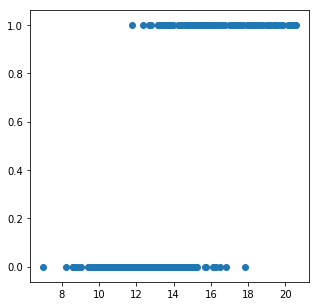

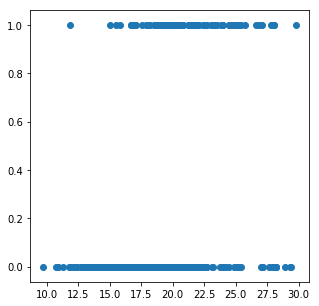

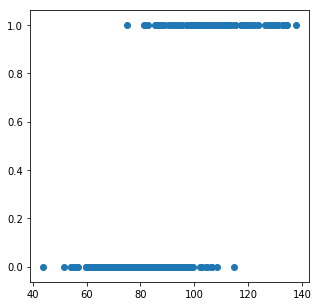

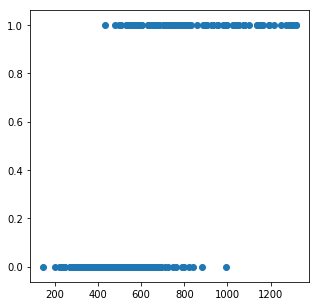

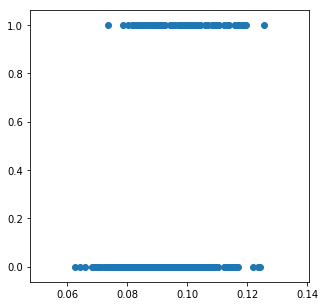

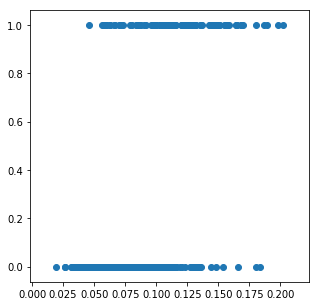

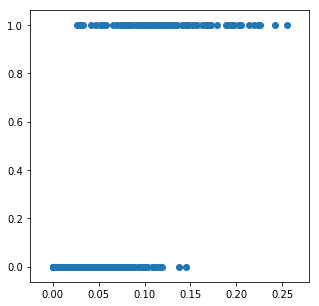

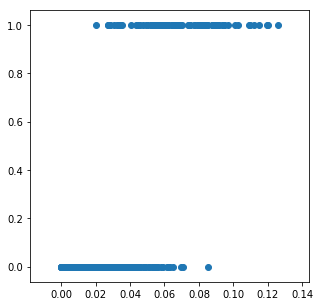

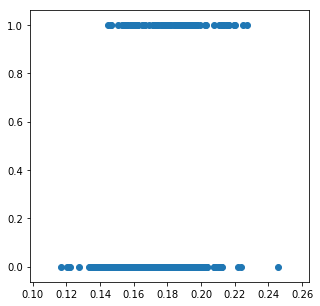

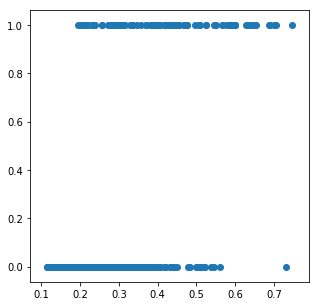

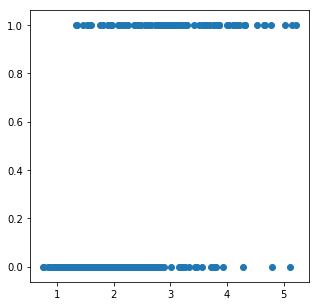

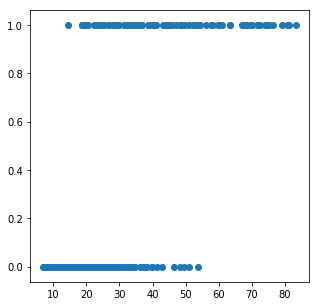

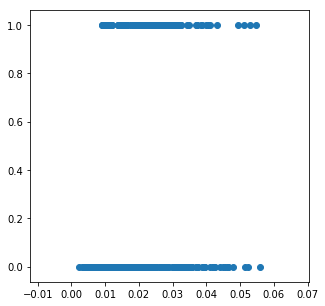

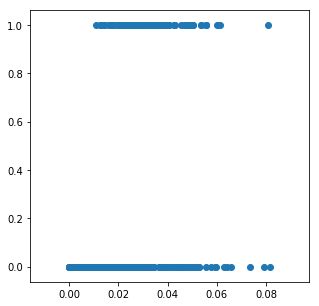

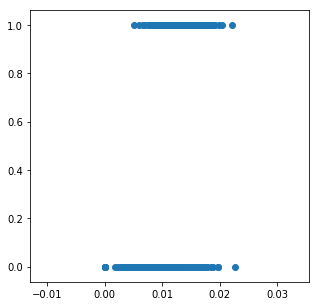

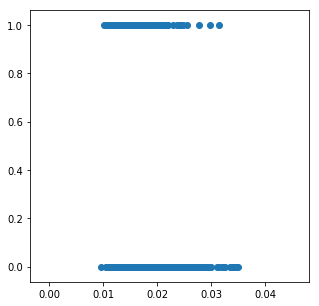

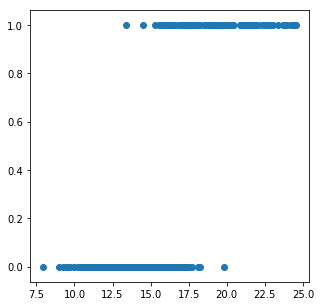

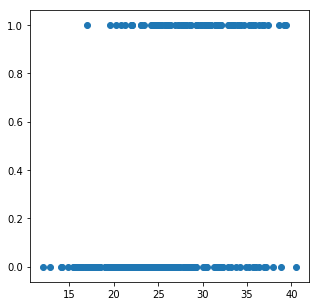

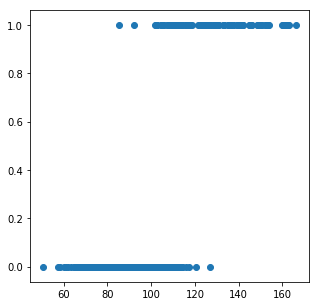

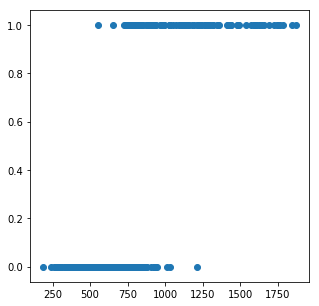

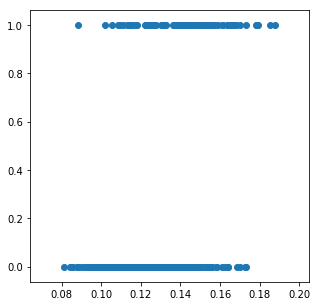

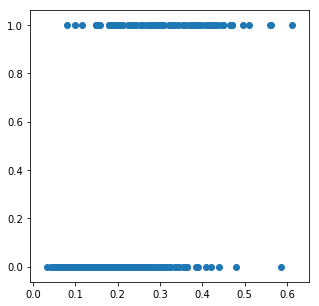

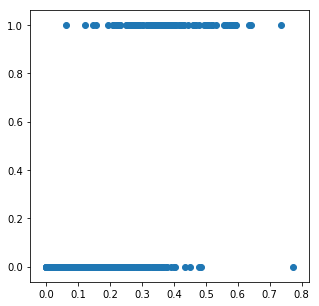

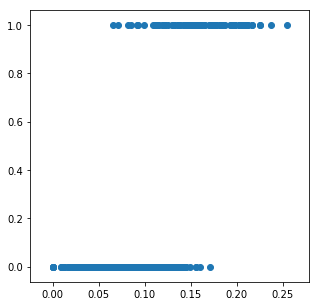

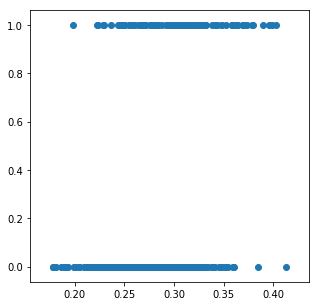

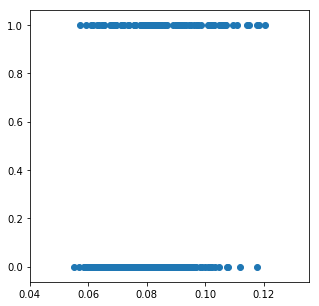

In [77]:

for i in df_feature_var.columns:
    fig, axs = plt.subplots(figsize = (5,5))
    plt.scatter(x = df_feature_var[i], y = df_labels);
    plt.show()


Divide the data set into training and test data set and build a KNN model.

In [78]:
from sklearn.model_selection import train_test_split
feature_df_train, feature_df_test, df_labels_train, df_labels_test = train_test_split(df_feature_var, df_labels, test_size=0.30, random_state=1)


Print the optimal value of K using Mis-classification error and the corresponding accuracy for the model

In [83]:
from sklearn.neighbors import KNeighborsClassifier# Call Nearest Neighbour algorithm
from sklearn.metrics import accuracy_score

mList = [3,5,7,9]
for k in mList:
    
    NNH = KNeighborsClassifier(n_neighbors= k  )
    NNH.fit(feature_df_train, df_labels_train.values.ravel())
    predicted_labels = NNH.predict(feature_df_test)
    print("Score for K value: {} is {}".format(k,accuracy_score(df_labels_test,predicted_labels)))
     
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Score for K value: 3 is 0.95


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Score for K value: 5 is 0.9583333333333334


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Score for K value: 7 is 0.9416666666666667


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

Score for K value: 9 is 0.9416666666666667


Print the optimal value of K using Mis-classification error and the corresponding accuracy for the model

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1,3,5,7,9,11,13,15,17,19]


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, feature_df_train, df_labels_train.values.ravel(), scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
#print (cv_scores)
#print (k_neighbors)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

0.06475485661424596

2

The optimal number of neighbors is 5


Plot misclassification error vs k (with k value on X-axis) using matplotlib

(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

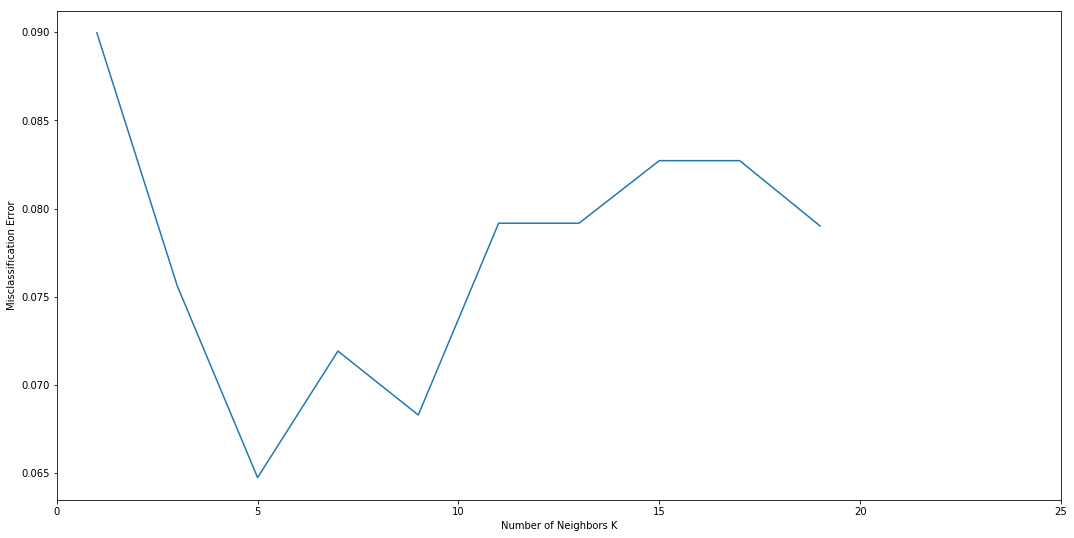

In [82]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()